### Piont data anlysis
This script will walk you through the basic point data anlysis using Tethys library. The scripts below includes retrieving data from envlib.org, plotting composite averages, plotting statistical distributions using violin plots and windrose for wind data.

#### import libraries

In [1]:
from tethysts import Tethys
from windrose import WindroseAxes
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr
from envlib_helper import *

The line below initiates the Tethys instance (service) before retrieving data from the server.

In [2]:
ts = Tethys()

We can get information of all the available datasets on [envlib.org](https://www.envlib.org) using the following line. This will save an excel file called "envlib_data_catalog.xlsx" in the current Jupyter environment. Once created, you can download to your own computer and find the information you need in the later process to retrieve any specific data.
You can also check the [web GUI](https://wai.tethys-ts.xyz) for all the information.

In [3]:
get_all_dataset_information(ts)

method  \
feature    parameter           owner                                            
atmosphere barometric_pressure ECMWF                               simulation   
                               Met Solutions                       simulation   
                               NZ Open Modelling Consortium        simulation   
                               NZ Open Modelling Consortium        simulation   
                               NZ Open Modelling Consortium        simulation   
...                                                                       ...   
waterway   temperature         Environment Canterbury        sensor_recording   
                               Environment Canterbury          field_activity   
           water_use           Environment Southland               simulation   
                               Environment Southland               simulation   
                               Environment Southland               simulation   

                                                                                              product_code  \
feature    parameter           owner                                                                         
atmosphere barometric_pressure ECMWF                                                  reanalysis-era5-land   
                               Met Solutions                         WRF NZ South Island Central Otago 3km   
                               NZ Open Modelling Consortium    UC WRF NZ South Island North Canterbury 1km   
                               NZ Open Modelling Consortium       UC WRF NZ South Island Central Otago 1km   
                               NZ Open Modelling Consortium  UC WRF NZ South Island Marlborough Nelson 1km   
...                                                                                                    ...   
waterway   temperature         Environment Canterbury                              quality_controlled_data   
                               Environment Canterbury                              quality_controlled_data   
           water_use           Environment Southland                               WAP allocation method 1   
                               Environment Southland                                   estimation method 1   
                               Environment Southland                             stream depletion method 1   

                                                            aggregation_statistic  \
feature    parameter           owner                                                
atmosphere barometric_pressure ECMWF                                instantaneous   
                               Met Solutions                        instantaneous   
                               NZ Open Modelling Consortium         instantaneous   
                               NZ Open Modelling Consortium         instantaneous   
                               NZ Open Modelling Consortium         instantaneous   
...                                                                           ...   
waterway   temperature         Environment Canterbury                        mean   
                               Environment Canterbury                    sporadic   
           water_use           Environment Southland                   cumulative   
                               Environment Southland                   cumulative   
                               Environment Southland                         mean   

                                                            frequency_interval  \
feature    parameter           owner                                             
atmosphere barometric_pressure ECMWF                                         H   
                               Met Solutions                                 H   
                               NZ Open Modelling Consortium                  H   
                               NZ Open Modelling Consortium           

#### Retrive a point data

You can use various ways to retrive time series from any point locations (AWS statoin observation, WRF simulation etc.). The code below demenstrates a most commonly way of retriving a dataset from the closiest lat and lon. The below example will retrieve all tier1 datasets from a FENZ AWS.

In [14]:
owner = "FENZ"
method = "sensor_recording"
product_code = "raw_data"
lat = -43.47
lon = 171.672

In [15]:
station_data=get_data_from_lat_lon(ts,owner,method,product_code,lat,lon)

In [16]:
data_slice = station_data.sel(time=slice("2019-01-01", "2020-12-31")) # change the data range accordingly

### Composite average anlysis 

Composite average is commonly used for climatological anlysis.

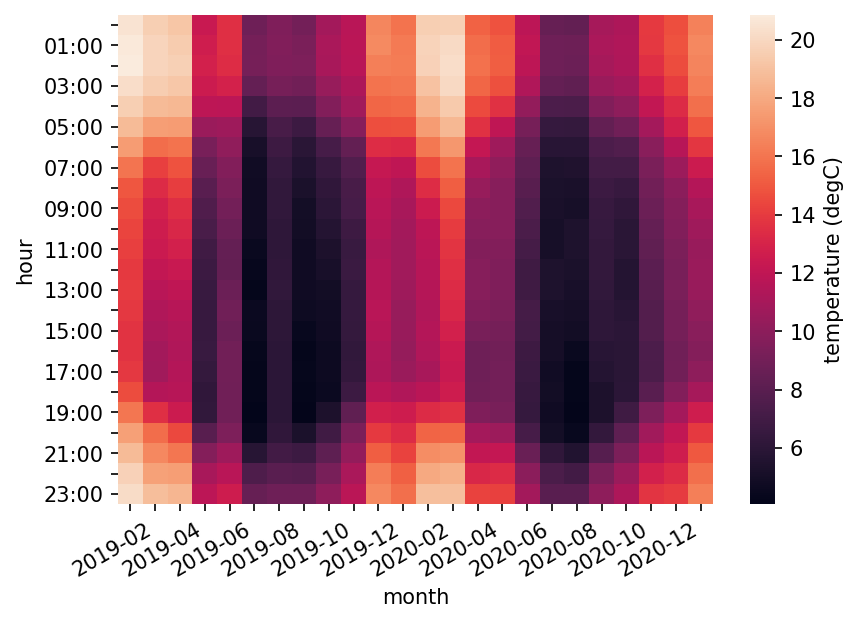

In [17]:
plot_hourly_composite(data_slice["temperature"],average="month",save_fig=True,save_files=True)

### violin plot

#### select time period

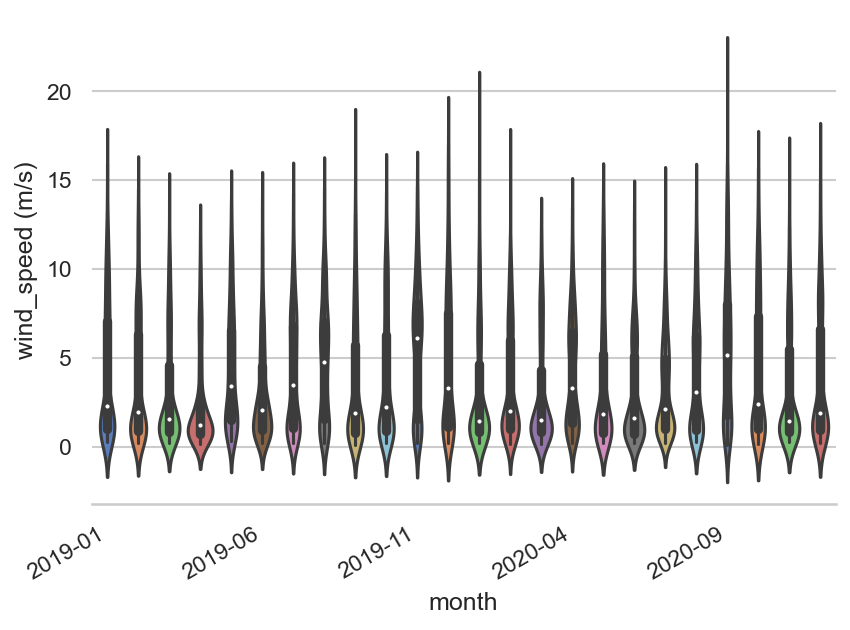

In [18]:
plot_violinplot(data_slice["wind_speed"],"month",save_fig=True,save_files=True)

#### Windrose

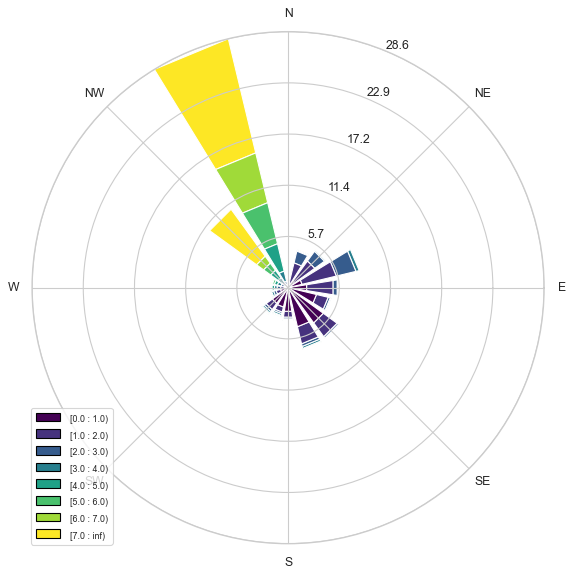

In [19]:
plot_wind_rose(data_slice.wind_speed,data_slice.wind_direction,save_fig=True)